# 作业1: 数据探索性分析与数据预处理


## 二、 Oakland Crime Statistics 2011 to 2016
### 1、数据说明

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

载入数据

In [50]:
path_list = []
for i in range(2011, 2012):
    path_list.append("./crime/oakland-crime-statistics-2011-to-2016/records-for-%s.csv"%(str(i)))
data = []
for path in path_list:
    data.append(pd.read_csv(path))
data = pd.concat(data)

数据的属性

In [51]:
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

属性类别数: 10
总行数: 180016
示例数据:


,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


### 2、数值摘要

In [52]:
num_fields = data.select_dtypes(include=np.number).columns.values
nom_fields = data.select_dtypes(exclude=np.number).columns.values
print('标称属性:', nom_fields)
print('数值属性:', num_fields)

标称属性: ['Agency' 'Create Time' 'Location' 'Beat' 'Incident Type Id'
 'Incident Type Description' 'Event Number' 'Closed Time']
数值属性: ['Area Id' 'Priority']


#### 1）标称属性
以“Location”属性为例，进行频数统计，其余标称属性类似。

In [53]:
field = 'Location'
print('频数统计:')
data[field].value_counts()

频数统计:


 INTERNATIONAL BLVD            3866
 MACARTHUR BLVD                3129
 AV&INTERNATIONAL BLVD         3067
 BROADWAY                      2132
 FOOTHILL BLVD                 1791
                               ... 
20TH ACRE RD&MACARTHUR BLVD       1
81ST 27TH ST                      1
FAIRFAX 93RD AV                   1
54TH ROSEDALE AV                  1
13TH ST&WEBSTER ST                1
Name: Location, Length: 32505, dtype: int64

#### 2）数值属性

In [54]:
data.describe()

,Area Id,Priority
count,179112.000000,180015.000000
mean,1.740648,1.796111
std,0.746468,0.402916
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


**5数概括**

Priority: 0, 2, 2, 2, 2

Zip Codes: 55, 4560, 13704, 22280, 33120
    

**缺失值数量统计**

In [56]:
print('null of Priority:',data['Priority'].isnull().sum())
print('null of Area Id:',data['Area Id'].isnull().sum())

null of Priority: 1
null of Area Id: 904


### 3、数据可视化

#### 1）标称属性
同样以“Location”属性为例，绘制直方图检查数据分布，其余标称属性类似。

<AxesSubplot:>

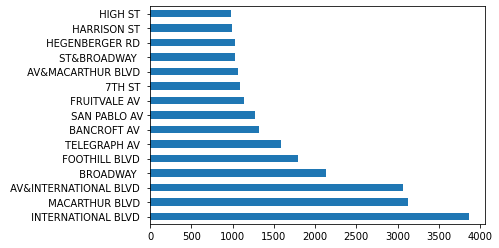

In [57]:
field = 'Location'
data[field].value_counts().head(15).plot.barh()

#### 2) 数值属性
绘制直方图和Q-Q图检查数据分布，并绘制盒图检查离群点。

Area Id 直方图和Q-Q图:


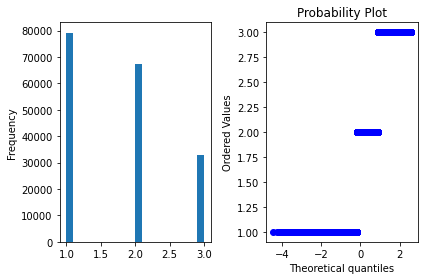

Priority 直方图和Q-Q图:


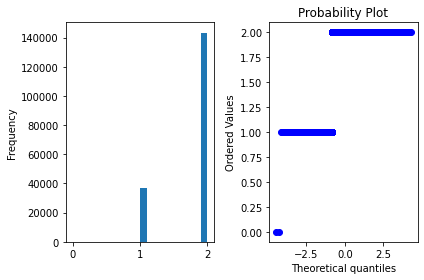

In [58]:
for field in num_fields:
    print(field, '直方图和Q-Q图:')
    plt.subplot(1, 2, 1)
    data[field].plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(data[field], plot=plt)
    plt.tight_layout()  # 调整整体空白
    plt.show()

**盒图**

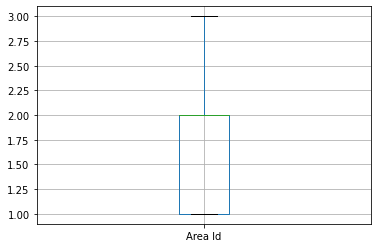

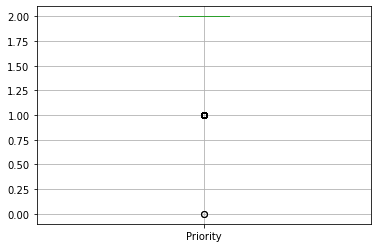

In [59]:
for field in num_fields:
    data.boxplot(field)
    plt.show()

#### 4、缺失数据处理

属性缺失值统计

In [60]:
missing_data = data.isnull().sum()
# missing_data = missing_data[missing_data != 0]
missing_data

Agency                         1
Create Time                    1
Location                       0
Area Id                      904
Beat                         520
Priority                       1
Incident Type Id               1
Incident Type Description      1
Event Number                   1
Closed Time                    7
dtype: int64

#### 1）将缺失部分剔除


In [61]:
print('原始数据行数:', len(data))
drop_data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))

原始数据行数: 180016
将缺失部分剔除后数据行数: 178771


以 Area Id 属性为例，通过盒图对比新旧数据:


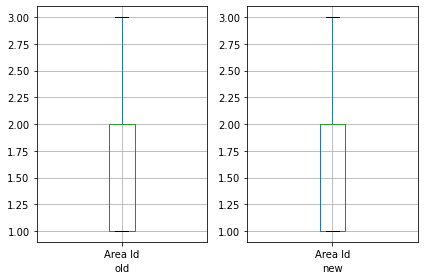

In [65]:
print('以 Area Id 属性为例，通过盒图对比新旧数据:')
field = 'Area Id'
plt.subplot(1, 2, 1)
data.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
drop_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

#### 2）用最高频率值填补缺失值

以 Area Id 属性为例，通过盒图对比新旧数据:
Area Id 属性的最高频率值为: 1.0


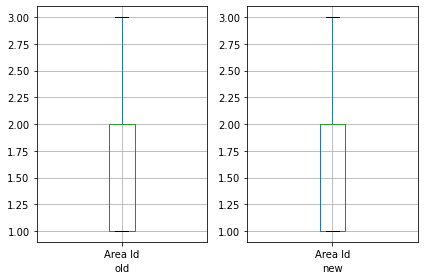

In [66]:
print('以 Area Id 属性为例，通过盒图对比新旧数据:')
field = 'Area Id'
mode = data[field].mode()[0]
new_data = data.fillna({field: mode})
print(field, '属性的最高频率值为:', mode)

plt.subplot(1, 2, 1)
data.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

In [67]:
data[data[field].isna()][field].head(5)

1187   NaN
1933   NaN
4227   NaN
4522   NaN
4567   NaN
Name: Area Id, dtype: float64

In [68]:
new_data[data[field].isna()][field].head(5)

1187    1.0
1933    1.0
4227    1.0
4522    1.0
4567    1.0
Name: Area Id, dtype: float64

#### 3）通过属性的相关关系来填补缺失值

In [69]:
data.corr()

,Area Id,Priority
Area Id,1.000000,-0.023366
Priority,-0.023366,1.000000


发现标值数据相关性十分弱，因此无法通过相关关系填补缺失值

#### 4）通过数据对象之间的相似性来填补缺失值

In [70]:
full_data = data[data['Area Id'].notna()]
new_data = data.copy()
# ['Agency' 'Create Time' 'Location' 'Beat' 'Incident Type Id'
#  'Incident Type Description' 'Event Number' 'Closed Time']
consider_fields = ['Location', 'Event Number', 'Agency']
for i, row in tqdm.tqdm(list(new_data[data['Area Id'].isna()].iterrows())):
    for field in consider_fields:
        tmp_data = full_data[full_data[field]==row[field]]
        if len(tmp_data) > 0:
            new_data['Area Id'][i] = tmp_data['Area Id'].mean()
            break

100%|██████████| 904/904 [00:15<00:00, 59.89it/s]


可视化对比

In [71]:
data[data['Area Id'].isna()].head(5)['Area Id']

1187   NaN
1933   NaN
4227   NaN
4522   NaN
4567   NaN
Name: Area Id, dtype: float64

In [72]:
new_data[data['Area Id'].isna()].head(5)['Area Id']

1187    1.951096
1933    2.601240
4227    2.000000
4522    3.000000
4567    2.646552
Name: Area Id, dtype: float64

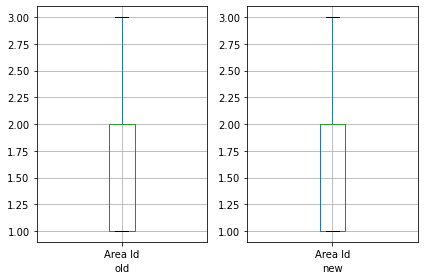

In [73]:
plt.subplot(1, 2, 1)
data.boxplot('Area Id')
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot('Area Id')
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()